In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import scipy
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [15]:
mer_tropical_box = xr.open_dataarray('/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/ERA5_Tropical_Box/mer_tropical_box.nc')
sst_tropical_box = xr.open_dataarray('/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/ERA5_Tropical_Box/sst_daily_tropical_band_1998_2022.nc')
vimfc_tropical_box = xr.open_dataarray('/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/ERA5_Tropical_Box/vimfc_tropical_box.nc')
viqtend_tropical_box = xr.open_dataarray('/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/ERA5_Tropical_Box/viqtend_tropical_box.nc')
T_P_tropical_box = xr.open_dataarray('/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/ERA5_Tropical_Box/T_P_tropical_box.nc')


In [16]:
viqtend_tropical_box

<xarray.DataArray 'vidq_dt' (time: 9131, latitude: 21, longitude: 81)>
[15531831 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2022-12-31
  * longitude  (longitude) float32 150.0 150.2 150.5 150.8 ... 169.5 169.8 170.0
  * latitude   (latitude) float32 -20.0 -19.75 -19.5 ... -15.5 -15.25 -15.0

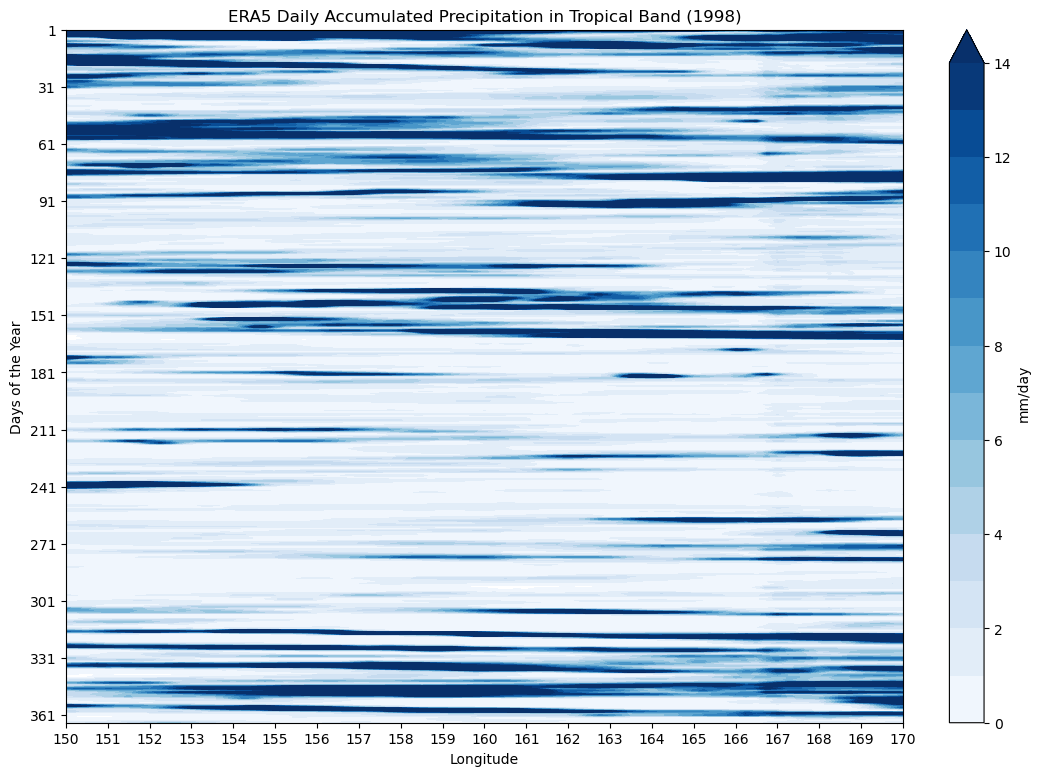

In [5]:
precipitation_dual_years_group = T_P_tropical_box.sel(time=slice('1998-01-01', '1998-12-31'))
sst_oisst_dual_years_group = sst_tropical_box.sel(time=slice('1998-01-01', '1998-12-31'))

# Hovmoller diagram with Precipitation (countourf) and SST (contour)
precip_tropical_band = precipitation_dual_years_group.sel(latitude=slice(-18,-15)).mean(dim='latitude')

sst_tropical_band = sst_oisst_dual_years_group.mean(dim='latitude')
 

figure, ax = plt.subplots(figsize=(12, 9))

levels = np.linspace(0, 14, 15)  
plt.contourf(precip_tropical_band*1000, cmap='Blues', levels=levels, extend='max')
plt.colorbar(label='mm/day', pad=0.05, fraction=0.05)

# ax.clabel(plt.contour(sst_tropical_band, colors='red', linewidths=2, levels=np.arange(10, 35, 1), alpha=0.8), inline=True, fontsize=10, fmt='%.1f')

plt.xticks(np.arange(0, 81, 4), np.arange(150, 171, 1))
plt.yticks(np.arange(0, 365, 30), np.arange(1, 365, 30))

plt.title('ERA5 Daily Accumulated Precipitation in Tropical Band (1998)')
plt.xlabel('Longitude')
plt.ylabel('Days of the Year')
ax.invert_yaxis()  # This also works to invert the y-axis
plt.show()

In [6]:
# dir for mac

sst_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/OISST/northeast_sst.nc"
prec_file_dir = "/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/TRMM/northeast_precip.nc"

sst_oisst = xr.open_dataarray(sst_file_dir)

sst_oisst = sst_oisst.loc[0: 8034,:, :]

precip = xr.open_dataarray(prec_file_dir)

date_time = pd.date_range(start='1998-01-01', periods=8034, freq='D')

sst_oisst['time'] = date_time

precip['time'] = date_time

precipitation_dual_years_group = precip.sel(time=slice('1998-01-01', '1998-12-31'))
sst_oisst_dual_years_group = sst_oisst.sel(time=slice('1998-01-01', '1998-12-31'))

In [7]:
# Hovmoller diagram with Precipitation (countourf) and SST (contour)
precip_tropical_band_TRMM = precipitation_dual_years_group.sel(lat=slice(-20,-14.8), lon=slice(150,170.2))

In [8]:
precip_tropical_band_TRMM

<xarray.DataArray 'precip' (time: 365, lat: 21, lon: 81)>
[620865 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -19.88 -19.62 -19.38 -19.12 ... -15.38 -15.12 -14.88
  * lon      (lon) float64 150.1 150.4 150.6 150.9 ... 169.4 169.6 169.9 170.1
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 1998-12-31

In [9]:
precipitation_dual_years_group = T_P_tropical_box.sel(time=slice('1998-01-01', '1998-12-31'))
sst_oisst_dual_years_group = sst_tropical_box.sel(time=slice('1998-01-01', '1998-12-31'))


In [10]:
precipitation_dual_years_group

<xarray.DataArray 'tp' (time: 365, latitude: 21, longitude: 81)>
[620865 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1998-01-01 1998-01-02 ... 1998-12-31
  * longitude  (longitude) float32 150.0 150.2 150.5 150.8 ... 169.5 169.8 170.0
  * latitude   (latitude) float32 -20.0 -19.75 -19.5 ... -15.5 -15.25 -15.0
Attributes:
    long_name:  Total precipitation
    units:      m

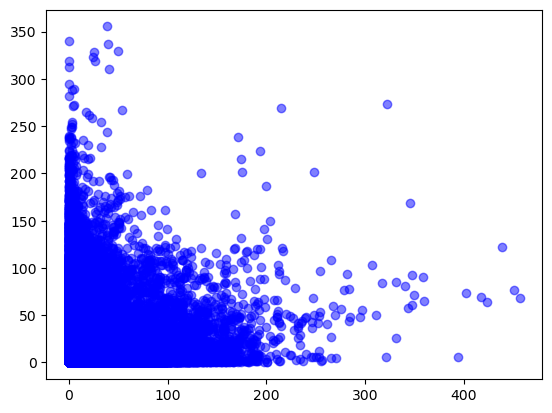

In [11]:
plt.scatter(precip_tropical_band_TRMM, precipitation_dual_years_group*1000, color='blue', label='Precipitation', alpha=0.5)

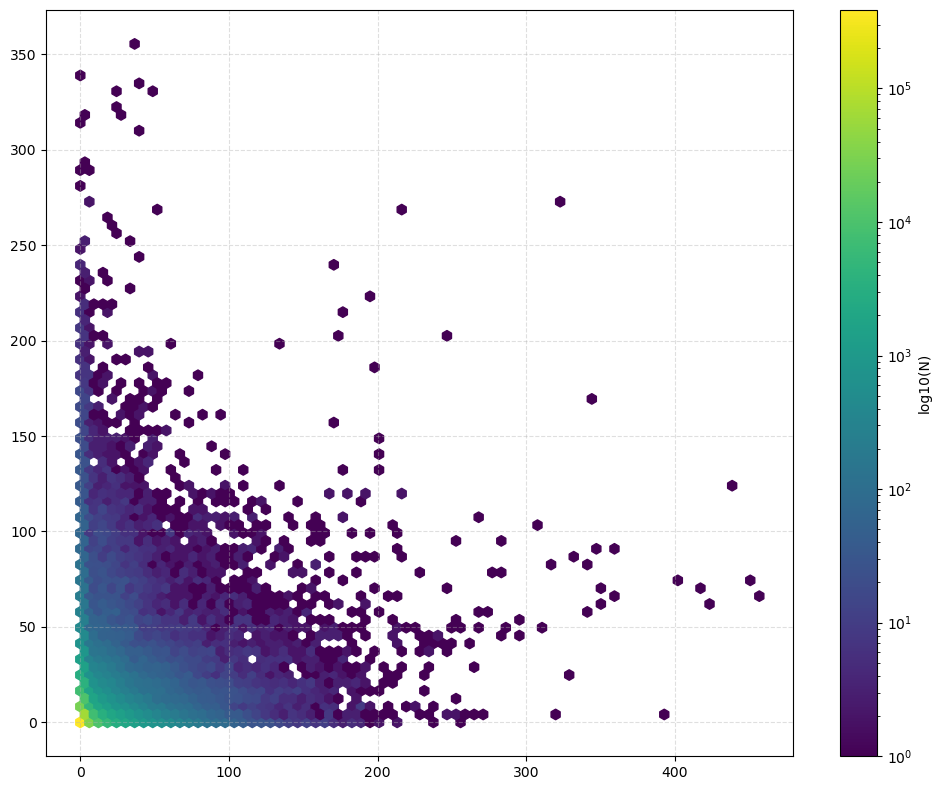

In [12]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Use hexbin which is much more efficient for large datasets
hb = ax.hexbin(precip_tropical_band_TRMM, precipitation_dual_years_group*1000, gridsize=75, cmap='viridis', 
               bins='log',  # Use logarithmic binning for better visualization
               mincnt=1)    # Only show cells with at least one point

# Add a colorbar
cbar = plt.colorbar(hb)
cbar.set_label('log10(N)')

# Add labels and title with correct units
# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.4)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()